In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.shape

(5172, 3002)

In [7]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [9]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# input data
x = df.drop(['Email No.', 'Prediction'], axis = 1)

# output data
y = df['Prediction']

In [13]:
x.shape

(5172, 3000)

In [15]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [17]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

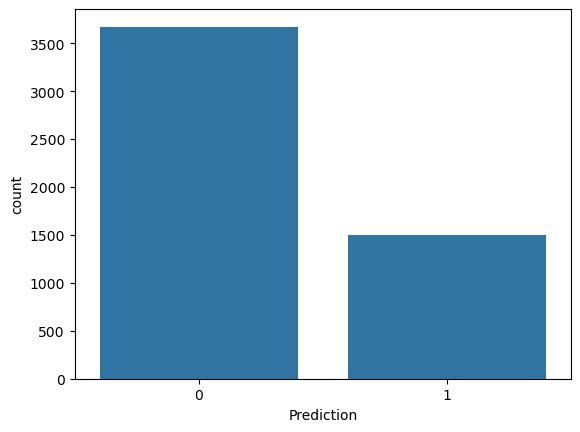

In [19]:
sns.countplot(x=y)

In [21]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [23]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
# Cross Validation -75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 0, test_size = 0.25)

In [29]:
x_scaled.shape

(5172, 3000)

In [31]:
x_train.shape

(3879, 3000)

In [33]:
x_test.shape

(1293, 3000)

# KNN - K Nearest Neighbors

In [37]:
# Accuracy = (TP + TN)/ Total

In [39]:
# Error Rate = 1 - Accuracy
# Error Rate = (FP+FN)/Total

In [41]:
# Precision = TP / Predicted Yes

In [43]:
# Recall = TP / Actual Yes

In [45]:
# F1 Score = 2 * (Precision * Recall)/(Precision + recall)

In [47]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Create the object
knn = KNeighborsClassifier(n_neighbors = 5)

In [51]:
# Train the algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
# Predict on test data
y_pred = knn.predict(x_test)

In [55]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [57]:
# Import the evalution metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

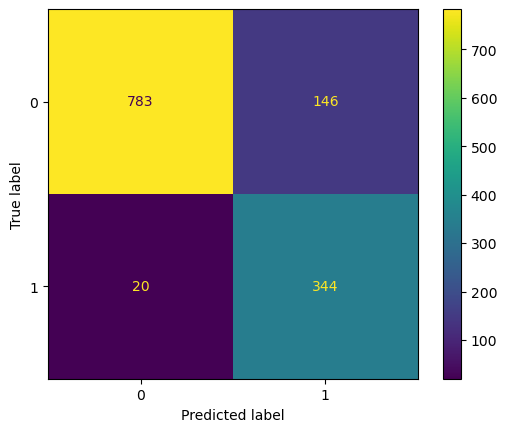

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [61]:
y_test.value_counts()

Prediction
0    929
1    364
Name: count, dtype: int64

In [63]:
accuracy_score(y_test, y_pred)

0.871616395978345

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [67]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

In [68]:
error

[0.10827532869296211,
 0.10982211910286156,
 0.12296983758700696,
 0.11523588553750967,
 0.12838360402165508,
 0.1214230471771075,
 0.15158546017014696,
 0.14849187935034802,
 0.17246713070378963,
 0.16705336426914152,
 0.1871616395978345,
 0.18329466357308585,
 0.21500386697602475,
 0.21345707656612528,
 0.22815158546017014,
 0.2266047950502707,
 0.23588553750966745,
 0.23356535189481825,
 0.2459396751740139,
 0.24361948955916474,
 0.2559938128383604,
 0.2552204176334107,
 0.2699149265274555,
 0.2691415313225058,
 0.2822892498066512,
 0.28306264501160094,
 0.2954369682907966,
 0.2923433874709977,
 0.3039443155452436,
 0.300077339520495,
 0.30549110595514306,
 0.30549110595514306,
 0.31245166279969067,
 0.31245166279969067,
 0.3194122196442382,
 0.317092034029389,
 0.32637277648878577,
 0.32559938128383603,
 0.33410672853828305,
 0.3325599381283836]

In [71]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [73]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [75]:
y_pred = knn.predict(x_test)

In [76]:
accuracy_score(y_test, y_pred)

0.8917246713070379

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       929
           1       0.77      0.88      0.82       364

    accuracy                           0.89      1293
   macro avg       0.86      0.89      0.87      1293
weighted avg       0.90      0.89      0.89      1293



# SVM - Support Vector Machine

In [82]:
from sklearn.svm import SVC

In [84]:
svm = SVC(kernel = 'linear')

In [86]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [87]:
y_pred = svm.predict(x_test)

In [88]:
accuracy_score(y_test, y_pred)

0.9767981438515081

In [89]:
svm = SVC(kernel = 'rbf')

In [90]:
svm.fit(x_train, y_train)

SVC()

In [91]:
y_pred = svm.predict(x_test)

In [92]:
accuracy_score(y_test, y_pred)

0.9450889404485692

In [93]:
svm = SVC(kernel = 'poly')

In [94]:
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [95]:
y_pred = svm.predict(x_test)

In [96]:
accuracy_score(y_test, y_pred)

0.7548337200309359

In [97]:
svm = SVC(kernel='sigmoid')

In [98]:
svm.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [99]:
y_pred = svm.predict(x_test)

In [100]:
accuracy_score(y_test, y_pred)

0.839907192575406

In [110]:
# Linear: 0.9767981438515081
# RBF: 0.9450889404485692
# Polynomial: 0.7548337200309359
# Sigmoid: 0.839907192575406